# --------------------------- Customer Profile Analysis  ---------------------------

In [1]:
# Import packages and configure settings
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
pd.set_option('display.max_columns', None)
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
# Load file
df = pd.read_csv('03. [DAZONE2024] DATASET.csv')
df

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Num_Web_Visits_Month,Promo_30,Promo_40,Promo_50,Promo_10,Promo_20,Complain,Gender,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method
0,6815,1982.0,PhD,30396.0,30-04-2023,22.0,16.0,2.0,6.0,0.0,1.0,12.0,2.0,1.0,1.0,2.0,7.0,1.0,-1.0,0.0,0.0,0.0,0.0,Male,NaN,8.416733e+10,2023.0,4.0,6.0,Married_1,Cash
1,2567,NaN,NaN,83532.0,26-09-2022,36.0,756.0,NaN,562.0,NaN,64.0,224.0,1.0,4.0,6.0,4.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,Other,8.431989e+10,NaN,NaN,NaN,15.0,Together_0,NaN
2,6053,1982.0,PhD,68682.0,06-10-2022,56.0,920.0,2.0,505.0,99.0,30.0,45.0,1.0,4.0,9.0,10.0,2.0,0.0,-1.0,0.0,0.0,0.0,0.0,Male,8.490853e+10,NaN,2022.0,10.0,24.0,Together_0,Cash
3,1985,2002.0,PhD,63516.0,06-07-2022,30.0,142.0,13.0,114.0,15.0,14.0,5.0,4.0,4.0,1.0,7.0,5.0,0.0,-1.0,0.0,0.0,0.0,0.0,Female,8.404168e+10,NaN,2022.0,7.0,16.0,Together_2,Online
4,6860,NaN,PhD,51650.0,11-05-2023,NaN,153.0,5.0,22.0,2.0,5.0,7.0,1.0,4.0,NaN,4.0,5.0,NaN,-1.0,0.0,NaN,0.0,0.0,NaN,8.491216e+10,NaN,2023.0,NaN,10.0,Married_1,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,2801,1990.0,Basic,20425.0,29-10-2021,5.0,5.0,14.0,5.0,3.0,16.0,17.0,2.0,2.0,0.0,3.0,7.0,0.0,-1.0,0.0,0.0,0.0,0.0,Other,8.414996e+10,NaN,2021.0,10.0,7.0,Married_1,Online
3065,8551,1990.0,PhD,65295.0,23-12-2022,19.0,366.0,34.0,117.0,34.0,110.0,6.0,1.0,3.0,3.0,13.0,2.0,0.0,-1.0,0.0,0.0,0.0,0.0,Female,NaN,8.409877e+10,2022.0,12.0,20.0,Single_0,Cash
3066,7831,1998.0,Graduation,31632.0,14-07-2022,92.0,18.0,10.0,12.0,11.0,15.0,32.0,1.0,2.0,1.0,2.0,7.0,0.0,-1.0,0.0,0.0,0.0,0.0,Female,8.431896e+10,NaN,2022.0,7.0,6.0,Single_0,NaN
3067,6426,1994.0,Master,61794.0,14-09-2022,74.0,265.0,49.0,188.0,54.0,47.0,11.0,2.0,4.0,4.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Male,8.452917e+10,NaN,2022.0,NaN,20.0,Married_1,Mobile


# 1. Data Processing

- After getting an overview, we noticed that there are many duplicate values and missing values. Additionally, there are many columns that are not suitable for the objective of the analysis

## 1.1. Handle Values

In [3]:
df.sort_values(by=['ID']).head(10)

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Num_Web_Visits_Month,Promo_30,Promo_40,Promo_50,Promo_10,Promo_20,Complain,Gender,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method
831,1001,1994.0,Graduation,61074.0,17-08-2021,37.0,790.0,2.0,133.0,0.0,28.0,152.0,7.0,11.0,5.0,8.0,7.0,0.0,-1.0,0.0,0.0,0.0,0.0,Other,8.412036e+10,NaN,NaN,NaN,31.0,Married_1,Card
1132,1002,1989.0,Graduation,60093.0,26-06-2022,92.0,503.0,14.0,109.0,16.0,6.0,90.0,2.0,7.0,2.0,10.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,Male,8.494833e+10,NaN,NaN,6.0,21.0,Married_1,Mobile
301,1005,1978.0,2n Cycle,79689.0,12-05-2022,65.0,312.0,28.0,640.0,180.0,37.0,121.0,1.0,4.0,9.0,13.0,2.0,0.0,-1.0,0.0,0.0,0.0,0.0,Female,8.444028e+10,NaN,2022.0,5.0,27.0,Single_0,Online
1101,1006,1987.0,Master,41021.0,30-12-2021,12.0,15.0,9.0,9.0,6.0,16.0,12.0,2.0,2.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,Female,8.494006e+10,NaN,2021.0,NaN,7.0,Together_1,Online
2888,1007,1996.0,PhD,57333.0,22-09-2021,55.0,942.0,16.0,397.0,76.0,58.0,176.0,11.0,8.0,5.0,9.0,6.0,0.0,-1.0,0.0,0.0,0.0,0.0,Male,8.433939e+10,NaN,2021.0,9.0,33.0,Divorced_1,Card
1948,1008,1996.0,PhD,75032.0,28-04-2022,74.0,953.0,14.0,180.0,47.0,12.0,12.0,2.0,5.0,4.0,9.0,3.0,0.0,-1.0,0.0,0.0,0.0,0.0,Female,8.451825e+10,NaN,2022.0,4.0,20.0,Married_1,Cash
3000,1017,1994.0,Graduation,83715.0,03-02-2023,2.0,NaN,10.0,407.0,NaN,35.0,8.0,NaN,NaN,8.0,NaN,NaN,0.0,-1.0,NaN,0.0,0.0,0.0,Other,NaN,NaN,2023.0,NaN,24.0,Married_0,Mobile
16,1017,1994.0,Graduation,83715.0,03-02-2023,2.0,319.0,10.0,407.0,150.0,35.0,8.0,1.0,2.0,8.0,13.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,Other,8.412810e+10,NaN,2023.0,NaN,24.0,Married_0,Mobile
1491,1017,1994.0,Graduation,83715.0,03-02-2023,2.0,319.0,10.0,407.0,150.0,35.0,NaN,1.0,2.0,8.0,NaN,NaN,0.0,-1.0,0.0,0.0,0.0,NaN,Other,8.412810e+10,NaN,2023.0,NaN,24.0,NaN,NaN
729,1018,1990.0,Graduation,31814.0,09-02-2022,73.0,36.0,5.0,20.0,4.0,1.0,20.0,2.0,2.0,0.0,3.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,Female,8.437174e+10,NaN,2022.0,2.0,7.0,Married_1,NaN


- Through initial observation, we noticed that there are many duplicates in the 'ID' column. For the same observation ID, we found many additional values

In [4]:
# Function to combine rows with the same ID
def combine_rows(df):
    # Group by 'ID'
    grouped = df.groupby('ID')
    
    # Define a function to handle the combination logic for each group
    def combine_group(group):
        combined_row = {}
        for column in group.columns:
            if column == 'ID':
                combined_row[column] = group[column].iloc[0]
            else:
                unique_values = group[column].dropna().unique()
                if len(unique_values) == 1:
                    combined_row[column] = unique_values[0]
                elif len(unique_values) > 1:
                    # Choose the maximum value in case of having 2 different values of column in same ID
                    combined_row[column] = group[column].max()
                else:
                    combined_row[column] = None
        return pd.Series(combined_row)

    # Apply the combination logic to each group
    combined_df = grouped.apply(combine_group).reset_index(drop=True)
    
    return combined_df

# Combine the rows
combined_df = combine_rows(df)

combined_df.sort_values(by=['ID']).head(10)

C:\Users\DUY UYEN\AppData\Local\Temp\ipykernel_12932\419819101.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_df = grouped.apply(combine_group).reset_index(drop=True)


,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Num_Web_Visits_Month,Promo_30,Promo_40,Promo_50,Promo_10,Promo_20,Complain,Gender,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method
0,1001,1994.0,Graduation,61074.0,17-08-2021,37.0,790.0,2.0,133.0,0.0,28.0,152.0,7.0,11.0,5.0,8.0,7.0,0.0,-1.0,0.0,0.0,0.0,0.0,Other,8.412036e+10,NaN,NaN,NaN,31.0,Married_1,Card
1,1002,1989.0,Graduation,60093.0,26-06-2022,92.0,503.0,14.0,109.0,16.0,6.0,90.0,2.0,7.0,2.0,10.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,Male,8.494833e+10,NaN,NaN,6.0,21.0,Married_1,Mobile
2,1005,1978.0,2n Cycle,79689.0,12-05-2022,65.0,312.0,28.0,640.0,180.0,37.0,121.0,1.0,4.0,9.0,13.0,2.0,0.0,-1.0,0.0,0.0,0.0,0.0,Female,8.444028e+10,NaN,2022.0,5.0,27.0,Single_0,Online
3,1006,1987.0,Master,41021.0,30-12-2021,12.0,15.0,9.0,9.0,6.0,16.0,12.0,2.0,2.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,Female,8.494006e+10,NaN,2021.0,NaN,7.0,Together_1,Online
4,1007,1996.0,PhD,57333.0,22-09-2021,55.0,942.0,16.0,397.0,76.0,58.0,176.0,11.0,8.0,5.0,9.0,6.0,0.0,-1.0,0.0,0.0,0.0,0.0,Male,8.433939e+10,NaN,2021.0,9.0,33.0,Divorced_1,Card
5,1008,1996.0,PhD,75032.0,28-04-2022,74.0,953.0,14.0,180.0,47.0,12.0,12.0,2.0,5.0,4.0,9.0,3.0,0.0,-1.0,0.0,0.0,0.0,0.0,Female,8.451825e+10,NaN,2022.0,4.0,20.0,Married_1,Cash
6,1017,1994.0,Graduation,83715.0,03-02-2023,2.0,319.0,10.0,407.0,150.0,35.0,8.0,1.0,2.0,8.0,13.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,Other,8.412810e+10,NaN,2023.0,NaN,24.0,Married_0,Mobile
7,1018,1990.0,Graduation,31814.0,09-02-2022,73.0,36.0,5.0,20.0,4.0,1.0,20.0,2.0,2.0,0.0,3.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,Female,8.437174e+10,NaN,2022.0,2.0,7.0,Married_1,None
8,1022,1985.0,Graduation,75693.0,06-12-2021,10.0,798.0,155.0,293.0,72.0,97.0,30.0,1.0,11.0,4.0,6.0,4.0,0.0,-1.0,0.0,1.0,0.0,0.0,Other,NaN,8.495765e+10,2021.0,12.0,22.0,Divorced_0,Online
9,1028,1985.0,PhD,40344.0,13-10-2022,48.0,211.0,2.0,6.0,0.0,0.0,2.0,2.0,4.0,1.0,5.0,7.0,0.0,-1.0,0.0,0.0,0.0,0.0,Male,8.488392e+10,NaN,2022.0,10.0,12.0,Married_1,Cash


In [5]:
combined_df.duplicated().any()

False

- There are no duplicate values anymore

## 1.2. Feature Engineering and Feature Selection

### 1.2.1. Phone Number 

- We have concatenated the two columns of the phone number back together. As they are not useful during the customer segmentation process, we temporarily commented out the syntax.

In [6]:
# # Phone Number
# combined_df['Phone'] = combined_df['Phone'].fillna(0).astype(np.int64)
# combined_df['Phone_Number'] = combined_df['Phone_Number'].fillna(0).astype(np.int64)
# combined_df['Phone Number'] = combined_df['Phone'] + combined_df['Phone_Number']

### 1.2.2. Promo_40

In [7]:
combined_df['Promo_40'].unique()

array([-1.,  0.,  1.])

- We noticed many values of '-1' in the 'Promo_40'. Therefore, we replaced '-1' with '1'

In [8]:
# Replace -1 by 1 in Promo_40
combined_df['Promo_40'].replace(-1, 1, inplace=True)
combined_df

C:\Users\DUY UYEN\AppData\Local\Temp\ipykernel_12932\515296566.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['Promo_40'].replace(-1, 1, inplace=True)


,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Num_Web_Visits_Month,Promo_30,Promo_40,Promo_50,Promo_10,Promo_20,Complain,Gender,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method
0,1001,1994.0,Graduation,61074.0,17-08-2021,37.0,790.0,2.0,133.0,0.0,28.0,152.0,7.0,11.0,5.0,8.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,Other,8.412036e+10,NaN,NaN,NaN,31.0,Married_1,Card
1,1002,1989.0,Graduation,60093.0,26-06-2022,92.0,503.0,14.0,109.0,16.0,6.0,90.0,2.0,7.0,2.0,10.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,Male,8.494833e+10,NaN,NaN,6.0,21.0,Married_1,Mobile
2,1005,1978.0,2n Cycle,79689.0,12-05-2022,65.0,312.0,28.0,640.0,180.0,37.0,121.0,1.0,4.0,9.0,13.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,Female,8.444028e+10,NaN,2022.0,5.0,27.0,Single_0,Online
3,1006,1987.0,Master,41021.0,30-12-2021,12.0,15.0,9.0,9.0,6.0,16.0,12.0,2.0,2.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,Female,8.494006e+10,NaN,2021.0,NaN,7.0,Together_1,Online
4,1007,1996.0,PhD,57333.0,22-09-2021,55.0,942.0,16.0,397.0,76.0,58.0,176.0,11.0,8.0,5.0,9.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,Male,8.433939e+10,NaN,2021.0,9.0,33.0,Divorced_1,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,9980,1992.0,Graduation,22010.0,30-06-2022,51.0,12.0,4.0,9.0,3.0,0.0,8.0,2.0,2.0,0.0,3.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,Male,NaN,8.464713e+10,2022.0,6.0,7.0,Together_1,Online
2236,9985,1986.0,Graduation,38361.0,27-12-2022,74.0,40.0,2.0,56.0,20.0,8.0,14.0,3.0,3.0,1.0,3.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,Female,8.447441e+10,NaN,2022.0,NaN,10.0,Together_1,Cash
2237,9986,1990.0,Graduation,56628.0,21-03-2023,30.0,480.0,7.0,82.0,7.0,17.0,171.0,2.0,7.0,6.0,5.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,Male,8.489301e+10,NaN,2023.0,NaN,20.0,Single_1,Mobile
2238,9990,1993.0,Graduation,75330.0,04-10-2021,94.0,556.0,84.0,257.0,93.0,61.0,61.0,4.0,10.0,3.0,12.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,Other,NaN,8.457901e+10,NaN,NaN,29.0,Married_2,Online


### 1.2.3. Living_With

In [9]:
# Split Living_With to Marital and Num_Child
combined_df[['Marital_Status', 'Num_Child']] = combined_df['Living_With'].str.split("_", expand=True)
combined_df

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Num_Web_Visits_Month,Promo_30,Promo_40,Promo_50,Promo_10,Promo_20,Complain,Gender,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method,Marital_Status,Num_Child
0,1001,1994.0,Graduation,61074.0,17-08-2021,37.0,790.0,2.0,133.0,0.0,28.0,152.0,7.0,11.0,5.0,8.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,Other,8.412036e+10,NaN,NaN,NaN,31.0,Married_1,Card,Married,1
1,1002,1989.0,Graduation,60093.0,26-06-2022,92.0,503.0,14.0,109.0,16.0,6.0,90.0,2.0,7.0,2.0,10.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,Male,8.494833e+10,NaN,NaN,6.0,21.0,Married_1,Mobile,Married,1
2,1005,1978.0,2n Cycle,79689.0,12-05-2022,65.0,312.0,28.0,640.0,180.0,37.0,121.0,1.0,4.0,9.0,13.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,Female,8.444028e+10,NaN,2022.0,5.0,27.0,Single_0,Online,Single,0
3,1006,1987.0,Master,41021.0,30-12-2021,12.0,15.0,9.0,9.0,6.0,16.0,12.0,2.0,2.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,Female,8.494006e+10,NaN,2021.0,NaN,7.0,Together_1,Online,Together,1
4,1007,1996.0,PhD,57333.0,22-09-2021,55.0,942.0,16.0,397.0,76.0,58.0,176.0,11.0,8.0,5.0,9.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,Male,8.433939e+10,NaN,2021.0,9.0,33.0,Divorced_1,Card,Divorced,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,9980,1992.0,Graduation,22010.0,30-06-2022,51.0,12.0,4.0,9.0,3.0,0.0,8.0,2.0,2.0,0.0,3.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,Male,NaN,8.464713e+10,2022.0,6.0,7.0,Together_1,Online,Together,1
2236,9985,1986.0,Graduation,38361.0,27-12-2022,74.0,40.0,2.0,56.0,20.0,8.0,14.0,3.0,3.0,1.0,3.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,Female,8.447441e+10,NaN,2022.0,NaN,10.0,Together_1,Cash,Together,1
2237,9986,1990.0,Graduation,56628.0,21-03-2023,30.0,480.0,7.0,82.0,7.0,17.0,171.0,2.0,7.0,6.0,5.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,Male,8.489301e+10,NaN,2023.0,NaN,20.0,Single_1,Mobile,Single,1
2238,9990,1993.0,Graduation,75330.0,04-10-2021,94.0,556.0,84.0,257.0,93.0,61.0,61.0,4.0,10.0,3.0,12.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,Other,NaN,8.457901e+10,NaN,NaN,29.0,Married_2,Online,Married,2


### 1.2.4. Total_Spend

In [10]:
# Create Total_Spend feature
combined_df['Total_Spend'] = combined_df[['Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy', 'Jewellery']].sum(axis=1)

### 1.2.5. Age

In [11]:
# Formatting datetime for Registration_Time
combined_df['Registration_Time'] = pd.to_datetime(combined_df['Registration_Time'], format='%d-%m-%Y')

# Assume the last day in dataset is today
today = combined_df['Registration_Time'].max()
year = today.year

# Calculate Age
combined_df['Age'] = year - combined_df['Year_Of_Birth']

### 1.2.6. Income

In [12]:
# Check percentage null of Income
combined_df['Income'].isnull().sum() / len(combined_df)

0.010714285714285714

- The percentage of missing values in Income is only 1%, so we can remove these records with null values

In [13]:
# Drop missing value in Income
combined_df.dropna(subset=['Income'], inplace=True)

### 1.2.7. Academic_Level

In [14]:
# Assume that 'Master', 'PhD', and '2n Cycle' should all be replace by 'PostGraduate'
combined_df['Academic_Level'] = combined_df['Academic_Level'].replace({'Graduation': 'Graduate', 
                                                                      'Basic': 'Undergraduate', 
                                                                      'Master': 'PostGraduate',
                                                                      'PhD': 'PostGraduate',
                                                                      '2n Cycle': 'PostGraduate'})

### 1.2.8. Marital_Status

In [15]:
# Assume that 'Absurd', 'YOLO', 'Alone be replace by 'Single' and 'Together' by 'Married'
combined_df['Marital_Status'] = combined_df['Marital_Status'].replace({   'Absurd': 'Single'
                                                                         ,'YOLO': 'Single'
                                                                         ,'Alone': 'Single'
                                                                         ,'Together':'Married'})

### 1.2.9. Year and Month

In [16]:
# Convert 'Registration_Time' to datetime 
combined_df['Registration_Time'] = pd.to_datetime(combined_df['Registration_Time'], format='%d-%m-%Y')

In [17]:
# Create 'Year' column from 'Registration_Time' column
combined_df['Year'] = combined_df['Registration_Time'].dt.year

In [18]:
# Create 'Month' column from 'Registration_Time' column
combined_df['Month'] = combined_df['Registration_Time'].dt.month

### 1.2.10. Payment_Method

In [19]:
# Replace missing values in Payment_Method by 'None'
combined_df['Payment_Method'] = combined_df['Payment_Method'].fillna('None')
combined_df['Payment_Method'].value_counts(normalize=True) * 100

Payment_Method
Online    22.021661
None      19.945848
Mobile    19.584838
Card      19.494585
Cash      18.953069
Name: proportion, dtype: float64

- The percentage of null values is too high, and the remaining elements of the 'Payment_Method' column are also equivalent to each other, so we cannot use the mode. Therefore, we decided to drop the 'Payment_Method'

In [20]:
combined_df = combined_df.drop(columns=['Payment_Method'])

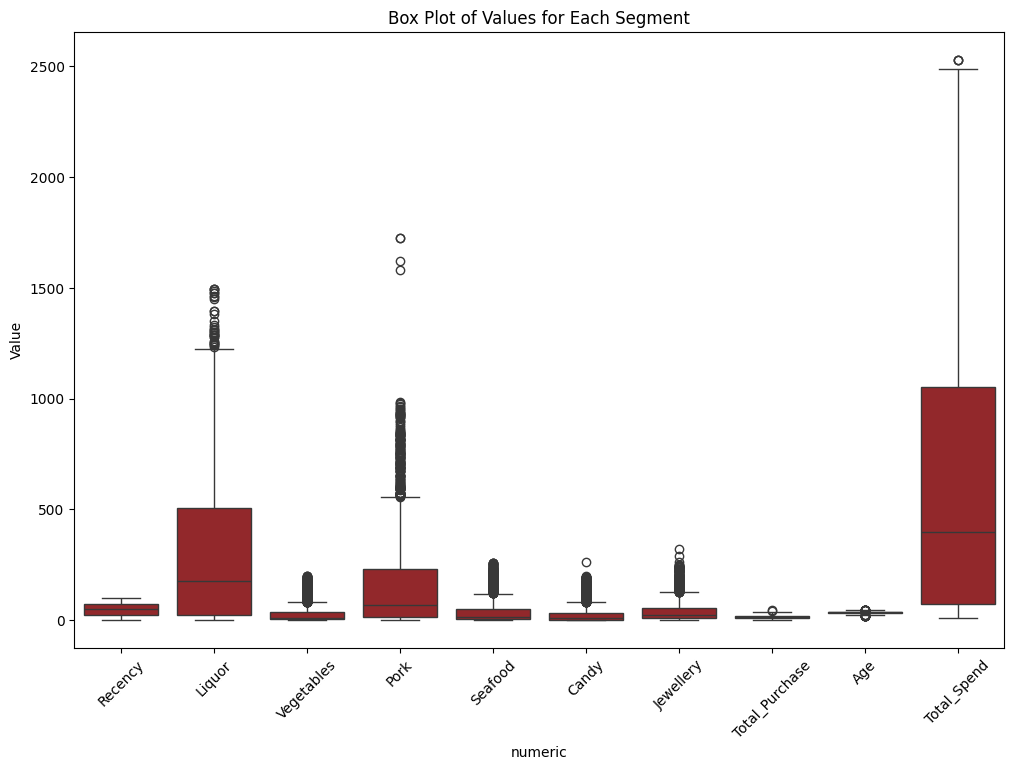

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of numerical feature
numerics = ['Recency', 'Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy', 'Jewellery', 'Total_Purchase', 'Age', 'Total_Spend']

# Create a DataFrame to hold the count of IDs for each segment
count_data = pd.DataFrame()

# Count the number of IDs for each segment
for numeric in numerics:
    count_data[numeric] = combined_df[numeric]

# Create a new column for total IDs
count_data['Total_ID'] = combined_df['ID']

# Melt the DataFrame to long format for seaborn
melted_data = pd.melt(count_data, id_vars=['Total_ID'], value_vars=numerics, var_name='numeric', value_name='Value')

# Create the box plot with the specified color
plt.figure(figsize=(12, 8))
sns.boxplot(x='numeric', y='Value', data=melted_data, color='#A4161A')
plt.xlabel('numeric')
plt.ylabel('Value')
plt.title('Box Plot of Values for Each Segment')
plt.xticks(rotation=45)
plt.show()


In [22]:
combined_df = combined_df[combined_df['Income'] < 150000]
combined_df = combined_df[combined_df['Pork'] < 1500]

## 1.2. EDA Features

### 1.2.1. Age

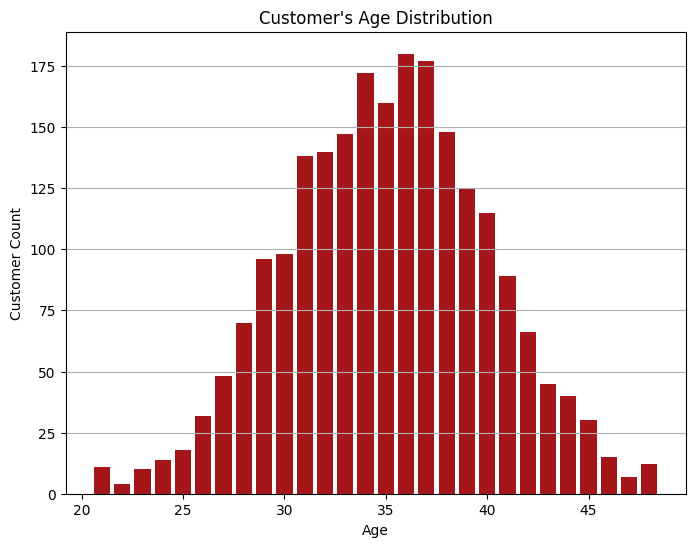

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Group by age and count the number of IDs in each age group
count_age = combined_df.groupby('Age')['ID'].count().reset_index()

# Define the figure size
plt.figure(figsize=(8, 6))

# Create the bar plot
plt.bar(count_age['Age'], count_age['ID'], color='#A4161A')

# Set the title and labels
plt.title("Customer's Age Distribution")
plt.xlabel('Age')
plt.ylabel('Customer Count')

# Show the plot
plt.grid(True, axis='y')
plt.show()

### 1.2.2. Registration_Time

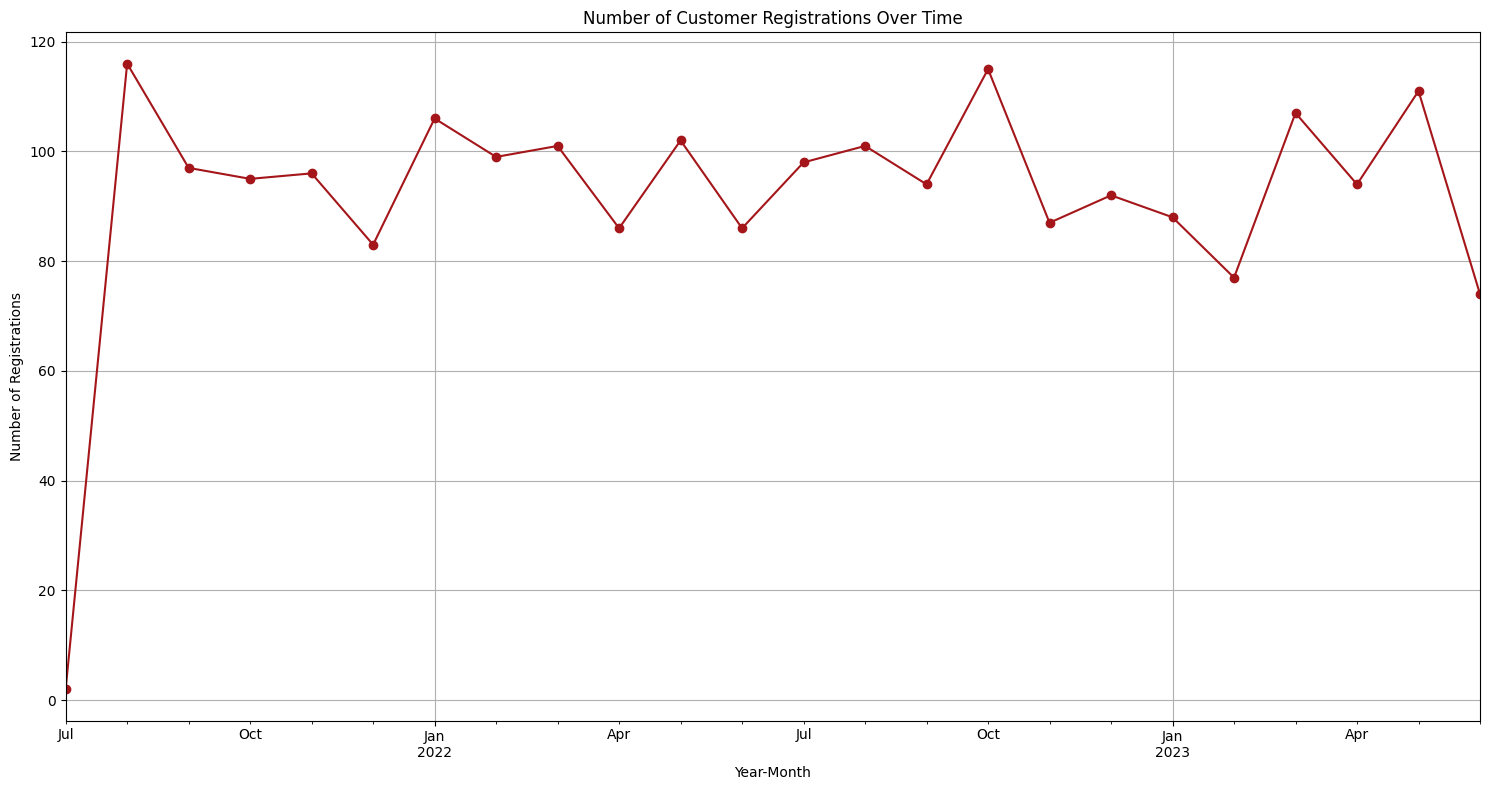

In [24]:
combined_df['year_month'] = combined_df['Registration_Time'].dt.to_period('M')

# Group by year_month and count the number of registrations
monthly_registrations = combined_df.groupby('year_month').size()

# Plotting
plt.figure(figsize=(15, 8))
monthly_registrations.plot(marker='o', color='#A4161A')
plt.title('Number of Customer Registrations Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Registrations')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [25]:
# Check the number of days in July 2021
combined_df[
    (combined_df['Registration_Time'] >= '2021-07-01') & 
    (combined_df['Registration_Time'] < '2021-08-01')]

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Num_Web_Visits_Month,Promo_30,Promo_40,Promo_50,Promo_10,Promo_20,Complain,Gender,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase,Living_With,Marital_Status,Num_Child,Total_Spend,Age,Year,Month,year_month
143,1575,1990.0,PostGraduate,55158.0,2021-07-30,72.0,294.0,2.0,87.0,4.0,11.0,23.0,4.0,7.0,2.0,5.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,Female,8.439995e+10,NaN,2021.0,7.0,18.0,Married_2,Married,2,421.0,33.0,2021,7,2021-07
1957,8847,1987.0,PostGraduate,52203.0,2021-07-31,36.0,489.0,23.0,238.0,56.0,108.0,28.0,1.0,8.0,7.0,11.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,Other,8.434038e+10,NaN,NaN,7.0,27.0,Together_0,Married,0,942.0,36.0,2021,7,2021-07


- The last 2 days of July cannot represent the entire month, so we exclude these 2 days

### 1.2.3. Academic_Level

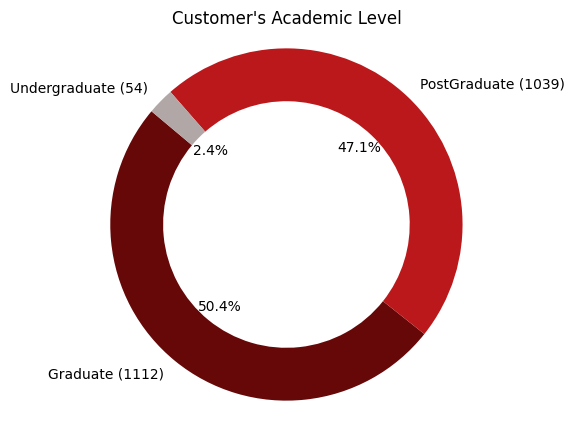

In [28]:
import matplotlib.pyplot as plt

# Group by 'Academic_Level' and count the number of IDs in each category
grouped = combined_df.groupby('Academic_Level')['ID'].count()

# Calculate the total count of IDs
total_count = grouped.sum()

# Calculate the percentage for each category
percentage = (grouped / total_count) * 100

# Create labels with both category name and count
labels = [f"{level} ({count})" for level, count in zip(grouped.index, grouped)]

# Create the donut chart
plt.figure(figsize=(5, 5))
plt.pie(grouped, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#660708', '#BA181B', '#B1A7A6', '#D3D3D3'], wedgeprops={'width': 0.3})

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title with correct escaping of single quote
plt.title("Customer's Academic Level")
plt.show()


### 1.2.4. Complain

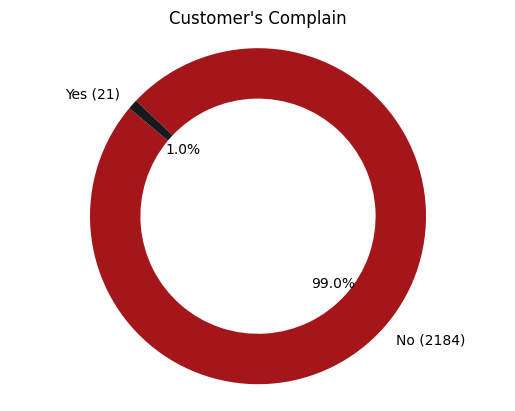

In [29]:
# Group by 'Complain' and count the number of IDs in each category
grouped_complain = combined_df.groupby('Complain')['ID'].count()

# Map the complain values from 0 and 1 to "No" and "Yes"
grouped_complain.index = grouped_complain.index.map({0: 'No', 1: 'Yes'})

# Calculate the total count of IDs
total_complain = grouped_complain.sum()

# Calculate the percentage for each category
percentage = (grouped_complain / total_complain) * 100

# Create labels with both category name and count
labels = [f"{level} ({count})" for level, count in zip(grouped_complain.index, grouped_complain)]

# Set background color to white
plt.figure(facecolor='white')

# Create the donut chart
plt.pie(grouped_complain, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#A4161A', '#161A1D'], wedgeprops={'width': 0.3})

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title with correct escaping of single quote
plt.title("Customer's Complain")
plt.show()


### 1.2.5. Num_Child

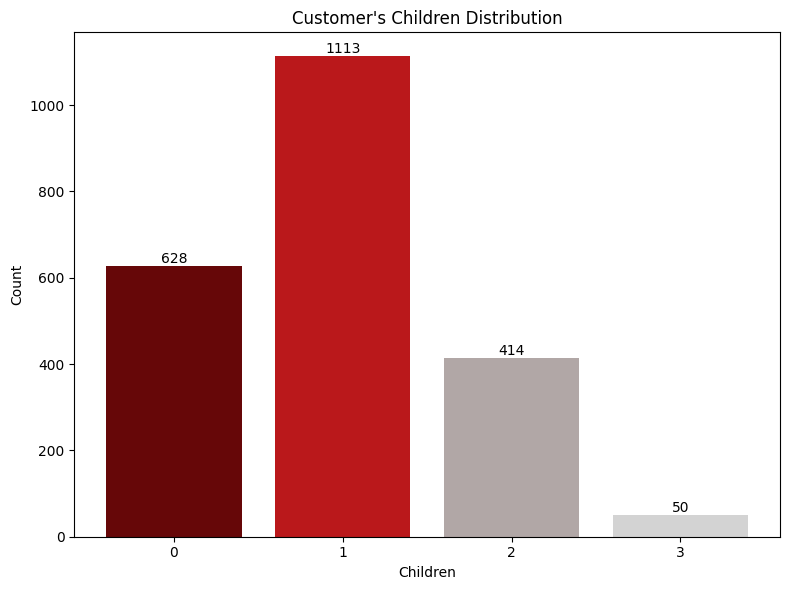

In [30]:
# Group by Num_Child and count the number of IDs in each age group
count_child = combined_df.groupby('Num_Child')['ID'].count().reset_index()

# Define the figure size
plt.figure(figsize=(8, 6))

# Create the bar plot
bars = plt.bar(count_child['Num_Child'], count_child['ID'], color=['#660708', '#BA181B', '#B1A7A6', '#D3D3D3'])

# Add data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

# Set the title and labels
plt.title("Customer's Children Distribution")
plt.xlabel('Children')
plt.ylabel('Count')

# Set the x-axis ticks and labels to show the index of each bar
plt.xticks(range(len(count_child)), count_child['Num_Child'])

# Show the plot
plt.tight_layout()
plt.show()


### 1.2.6. Categories ('Liquor','Vegetables', 'Pork', 'Seafood', 'Candy', 'Jewellery')

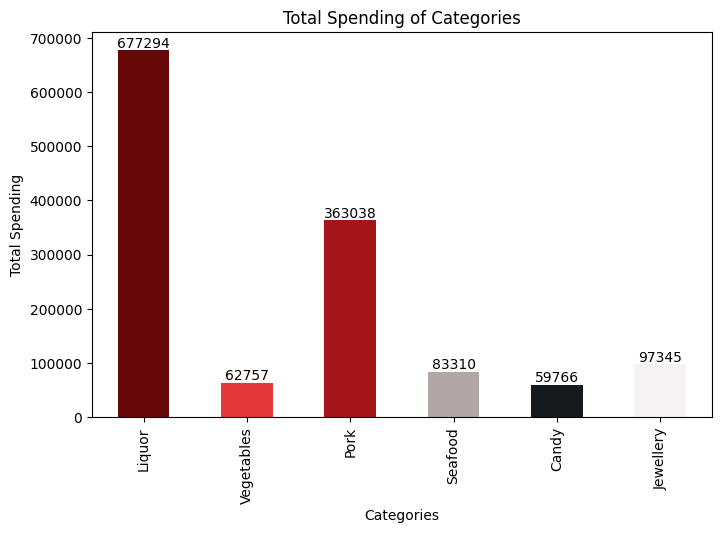

In [31]:
column_sums = combined_df[['Liquor','Vegetables', 'Pork', 'Seafood', 'Candy', 'Jewellery']].sum()

# Create bar chart
plt.figure(figsize=(8, 5))
bars = column_sums.plot(kind='bar', color=['#660708', '#E5383B', '#A4161A','#B1A7A6','#161A1D', '#F5F3F4'])
# Add data labels on top of the bars

for i, bar in enumerate(bars.containers[0]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')
    
plt.title('Total Spending of Categories')
plt.xlabel('Categories')
plt.ylabel('Total Spending')
plt.show()

### 1.2.6. Promotions

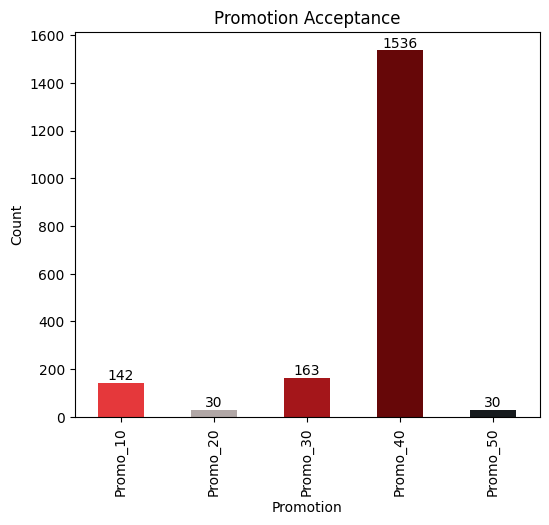

In [32]:
column_sums = combined_df[['Promo_10','Promo_20', 'Promo_30', 'Promo_40', 'Promo_50']].sum()

# Create bar chart
plt.figure(figsize=(6, 5))
bars = column_sums.plot(kind='bar', color=['#E5383B', '#B1A7A6', '#A4161A','#660708','#161A1D'])
# Add data labels on top of the bars

for i, bar in enumerate(bars.containers[0]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')
    
plt.title('Promotion Acceptance')
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.show()

### 1.2.7. Purchase Method 

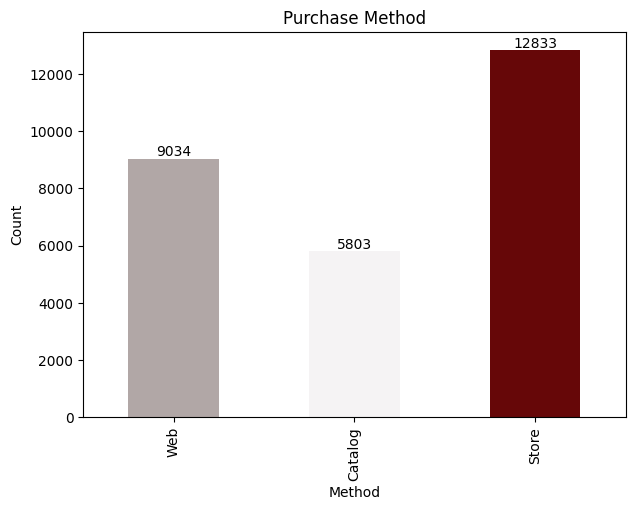

In [33]:
column_sums = combined_df[['Num_Web_Purchases','Num_Catalog_Purchases', 'Num_Store_Purchases']].sum()

# Create bar chart
plt.figure(figsize=(7, 5))
bars = column_sums.plot(kind='bar', color=['#B1A7A6', '#F5F3F4', '#660708'])

# Add data labels on top of the bars
for i, bar in enumerate(bars.containers[0]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')
plt.xticks(range(len(column_sums.index)), ['Web', 'Catalog', 'Store'])   
plt.title('Purchase Method')
plt.xlabel('Method')
plt.ylabel('Count')
plt.show()

### 1.2.8. Age

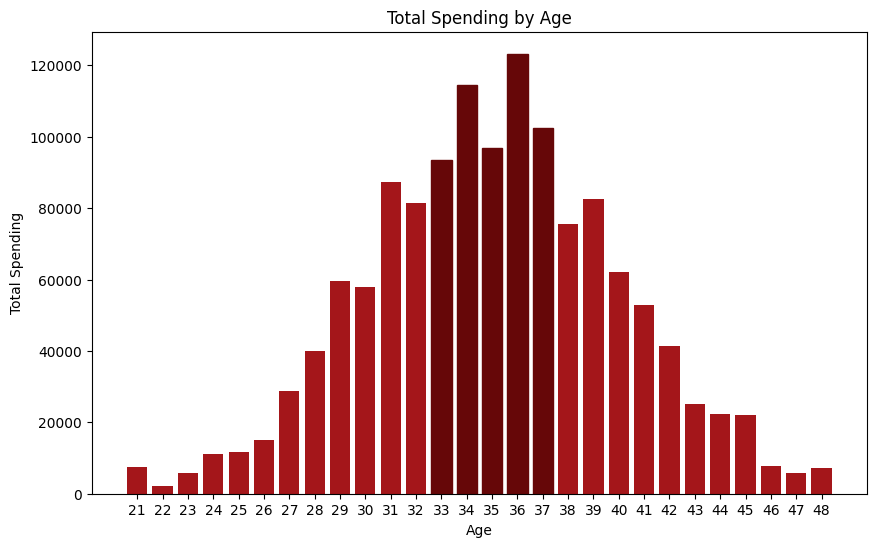

In [34]:
# Group the data by the 'Age' column and calculate the total spending
age_spend = combined_df.groupby('Age')['Total_Spend'].sum()

# Sort the values in descending order and select the top 5 highest values
top_5_age_spend = age_spend.nlargest(5)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(age_spend.index, age_spend.values, color='#A4161A')

# Change the color of the top 5 bars with the highest values
for i, age in enumerate(age_spend.index):
    if age in top_5_age_spend.index:
        bars[i].set_color('#660708')

plt.title('Total Spending by Age')
plt.xlabel('Age')
plt.ylabel('Total Spending')

# Set the x-axis ticks and labels to display the index of each bar
plt.xticks(age_spend.index)

plt.show()

### 1.2.9 Num Child

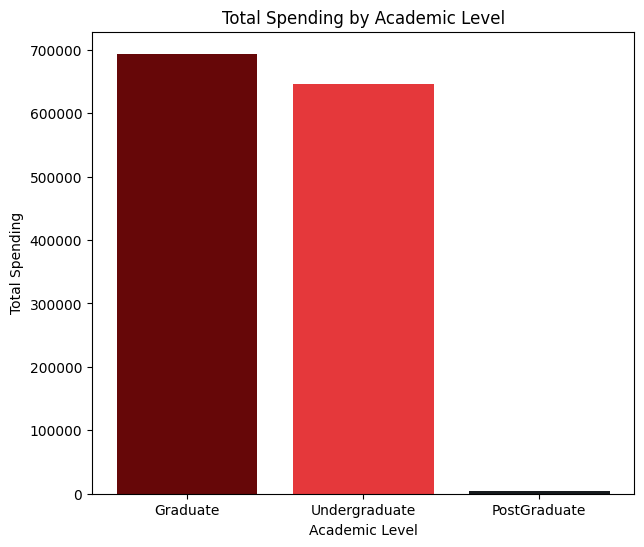

In [36]:
# Group the data by the 'Academic_Level' column and calculate the total spending
aca_spend = combined_df.groupby('Academic_Level')['Total_Spend'].sum()

# Create the bar chart
plt.figure(figsize=(7, 6))
child_chart = plt.bar(aca_spend.index, aca_spend.values, color=['#660708', '#E5383B', '#161A1D'])
plt.title('Total Spending by Academic Level')
plt.xlabel('Academic Level')
plt.ylabel('Total Spending')

# Set the x-axis ticks and labels to show the English names of each academic level
english_labels = ['Graduate', 'Undergraduate', 'PostGraduate']
plt.xticks(aca_spend.index, labels=english_labels)

plt.show()


### 1.2.11 Marital Status

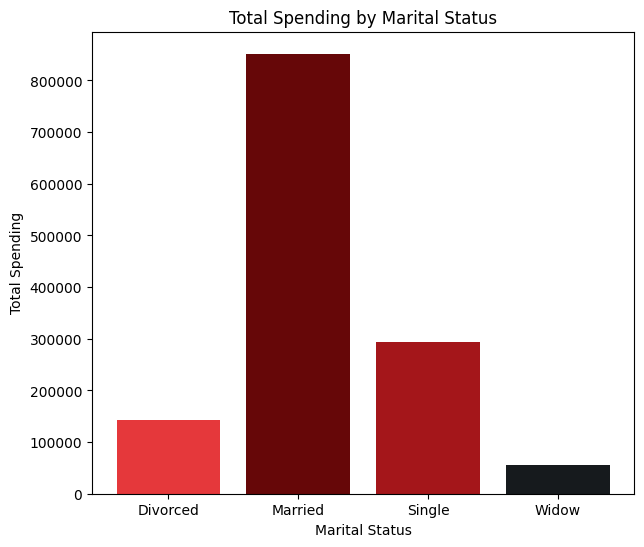

In [37]:
# Group the data by the 'Marital_Status' column and calculate the total spending
marital_spending = combined_df.groupby('Marital_Status')['Total_Spend'].sum()

# Plot the bar chart
plt.figure(figsize=(7, 6))
child_chart= plt.bar(marital_spending.index, marital_spending.values, color=['#E5383B','#660708', '#A4161A', '#161A1D'])
plt.title('Total Spending by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Spending')
# Set the x-axis ticks and labels to display the index of each bar
plt.xticks(marital_spending.index, labels=marital_spending.index)
plt.show()


### 1.2.12 Total Purchase by Age

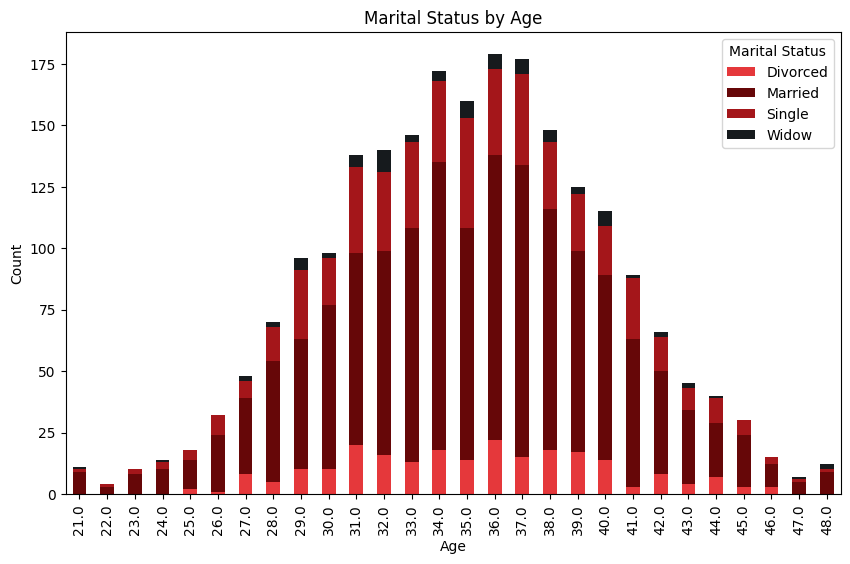

In [42]:
# Define the colors for each marital status category
colors = ['#E5383B', '#660708', '#A4161A', '#161A1D']

# Group 'Marital_Status' and 'Age', and count the occurrences
grouped = combined_df.groupby(['Age', 'Marital_Status']).size().unstack(fill_value=0)

# Reorder the columns to match the desired order ('divorced', 'married', 'single', 'widow')
# grouped = grouped[['divorced', 'married', 'single', 'widow']]

# Plot the stacked bar chart with the specified color palette
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Set the labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Marital Status by Age')

# Show the plot
plt.legend(title='Marital Status')
plt.show()


### 1.2.18 Total Spend by Categories and Marital 

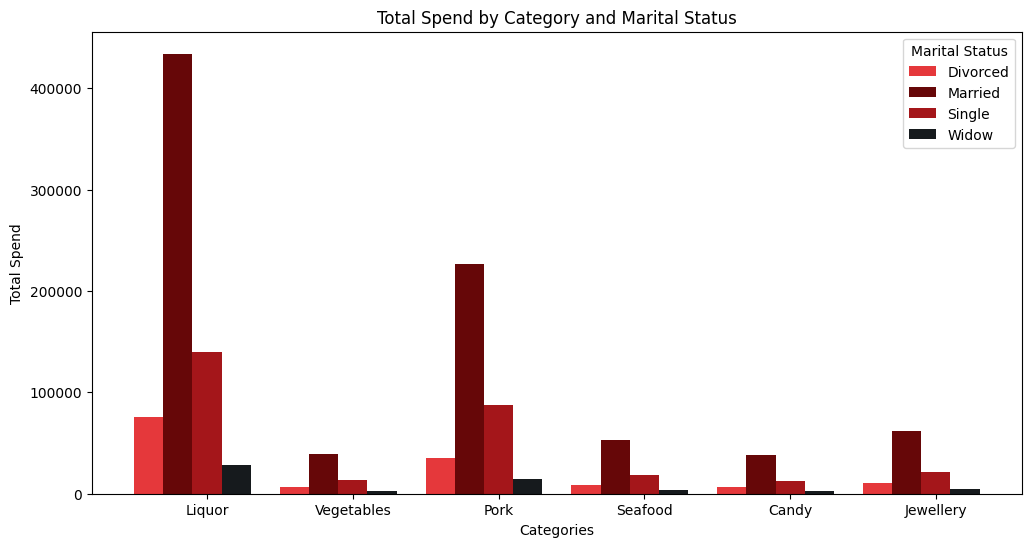

In [44]:
# Define categories
categories = ['Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy', 'Jewellery']

# Calculate the total spending for each marital status across categories
marr_cate_spend = combined_df.groupby(['Marital_Status'])[categories].sum()

# Create array of indices for the columns
x = np.arange(len(categories))

# Set the width of the bars
bar_width = 0.2

# Define the color palette for marital status
colors = ['#E5383B', '#660708', '#A4161A', '#161A1D']

# Plot the grouped bar chart with the specified color palette
fig, ax = plt.subplots(figsize=(12, 6))

for i, marital_status in enumerate(marr_cate_spend.index):
    ax.bar(x + i * bar_width, marr_cate_spend.loc[marital_status], bar_width, label=marital_status, color=colors[i])

# Set labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Total Spend')
ax.set_title('Total Spend by Category and Marital Status')
ax.set_xticks(x + bar_width * (len(marr_cate_spend) / 2))
ax.set_xticklabels(categories)
ax.legend(title='Marital Status')

plt.show()


### 1.2.19 Total Spend by Categories and Num Child

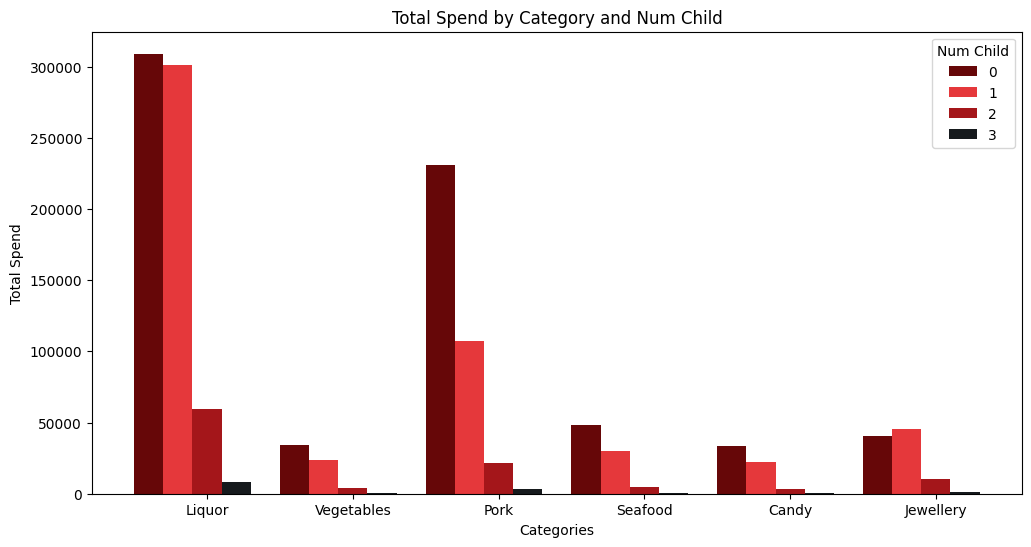

In [45]:
# Define categories
categories = ['Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy', 'Jewellery']

# Calculate the total spending for each "Num Child" category across categories
child_cate_spend = combined_df.groupby(['Num_Child'])[categories].sum()

# Create array of indices for the columns
x = np.arange(len(categories))

# Set the width of the bars
bar_width = 0.2

# Define the color palette for "Num Child" categories
colors = [ '#660708','#E5383B', '#A4161A', '#161A1D']

# Plot the grouped bar chart with the specified color palette
fig, ax = plt.subplots(figsize=(12, 6))

for i, num_child in enumerate(child_cate_spend.index):
    ax.bar(x + i * bar_width, child_cate_spend.loc[num_child], bar_width, label=num_child, color=colors[i])

# Set labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Total Spend')
ax.set_title('Total Spend by Category and Num Child')
ax.set_xticks(x + bar_width * (len(child_cate_spend) / 2))
ax.set_xticklabels(categories)
ax.legend(title='Num Child')

plt.show()


### 1.2.20 Income Distribution 

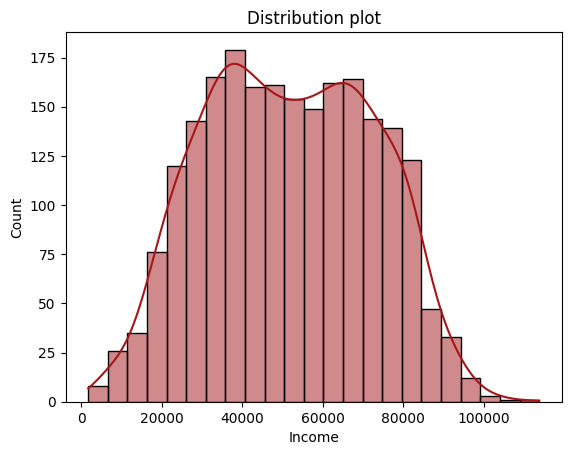

In [46]:
import plotly.graph_objects as go
# Create the histogram using seaborn
sns.histplot(data=combined_df, x="Income", kde=True,color='#A4161A')
plt.title("Distribution plot")
# Adjust the layout using Plotly
layout = go.Layout(
    height=600,
    width=1000,
    title='<b>Histograms</b>',
    titlefont=dict(size=20),
    template='plotly_dark',
    title_x=0.5,
    font=dict(family='Courier New'),
    showlegend=False)

fig = go.Figure(layout=layout)

# Show the plot
plt.show(fig)

### 1.2.21 Heatmap

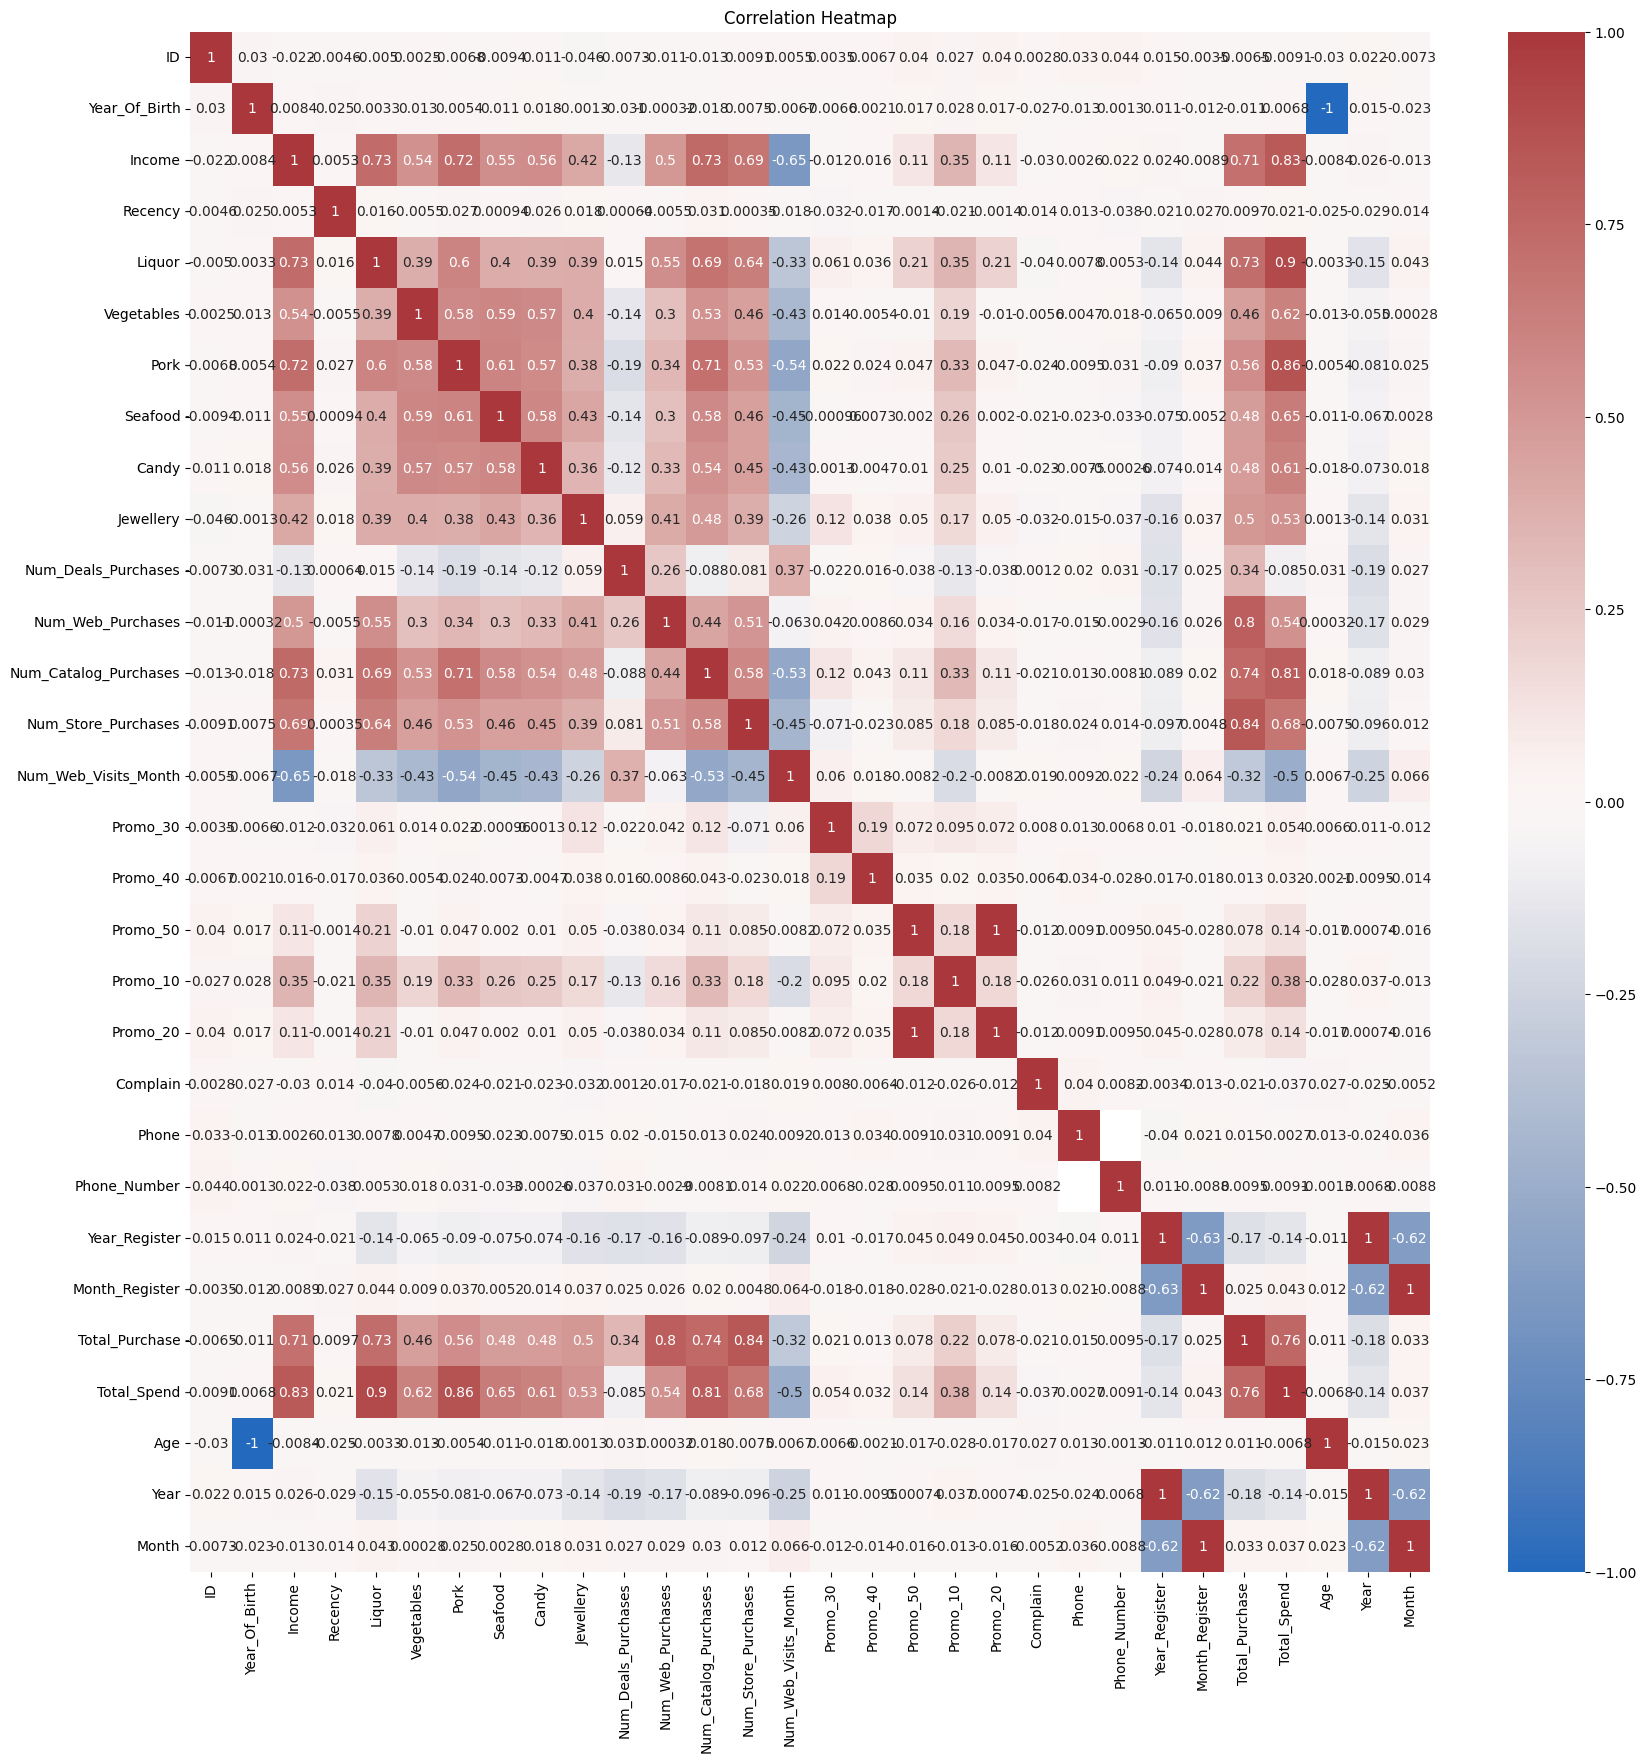

In [47]:
# Remove non-numeric columns or encode them as numeric values if needed
numeric_columns = combined_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()
custom_color = sns.color_palette("vlag", as_cmap=True) 
#sns.color_palette("coolwarm", as_cmap=True) 

# Create the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_color, center=0)

# Set the title and show the plot
plt.title('Correlation Heatmap')
plt.show()

- Transform all features to the same range
- We have noticed that the dataset contains many outliers. Therefore, we have decided to use MinMaxScaler instead of StandardScaler to mitigate the influence of these outliers.